In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from merf.merf import MERF
from sklearn.model_selection import train_test_split

# Sleep Study

We evaluate the performance of MERF on a famous sleep study dataset with 180 samples and 18 clusters (with 10 samples each). 

In [11]:
sleep_df = pd.read_csv('../data/sleepstudy.csv')

Text(0,0.5,'Reaction')

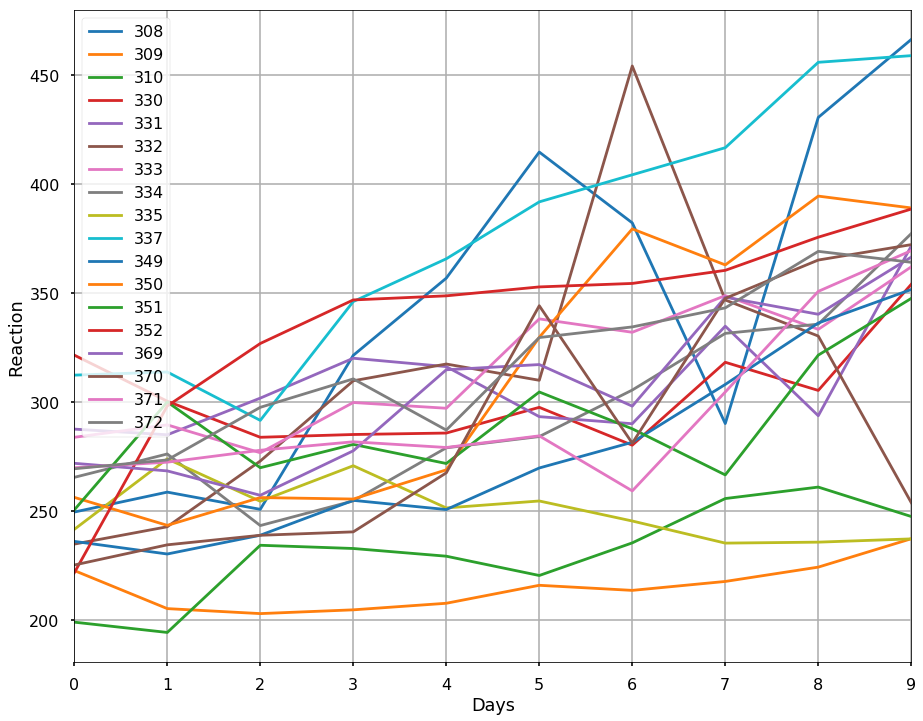

In [12]:
fig, ax = plt.subplots(figsize=(15,12))
for label, group in sleep_df.groupby('Subject'):
    group.plot(x='Days', y='Reaction', ax=ax, label=label)
plt.legend()
plt.grid('on')
plt.ylabel('Reaction')

In [56]:
sleep_df.head()

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308


INFO     [merf.py:235] GLL is 1417.9372607356308 at iteration 1.
INFO     [merf.py:235] GLL is 1413.955659609921 at iteration 2.
INFO     [merf.py:235] GLL is 1414.767475524352 at iteration 3.
INFO     [merf.py:235] GLL is 1414.8672326514634 at iteration 4.
INFO     [merf.py:235] GLL is 1416.1567119370964 at iteration 5.
INFO     [merf.py:235] GLL is 1415.723533799437 at iteration 6.
INFO     [merf.py:235] GLL is 1416.3305719822506 at iteration 7.
INFO     [merf.py:235] GLL is 1414.0777847544164 at iteration 8.
INFO     [merf.py:235] GLL is 1415.6755731709015 at iteration 9.
INFO     [merf.py:235] GLL is 1414.624778316228 at iteration 10.
INFO     [merf.py:235] GLL is 1415.3716888665278 at iteration 11.
INFO     [merf.py:235] GLL is 1415.7613870547507 at iteration 12.
INFO     [merf.py:235] GLL is 1413.7792522370605 at iteration 13.
INFO     [merf.py:235] GLL is 1416.5454602222974 at iteration 14.
INFO     [merf.py:235] GLL is 1415.9413752660723 at iteration 15.
INFO     [merf.py:235] 

Text(0.5,1,'MSE RF = 12.004, MSE MERF = 8.955')

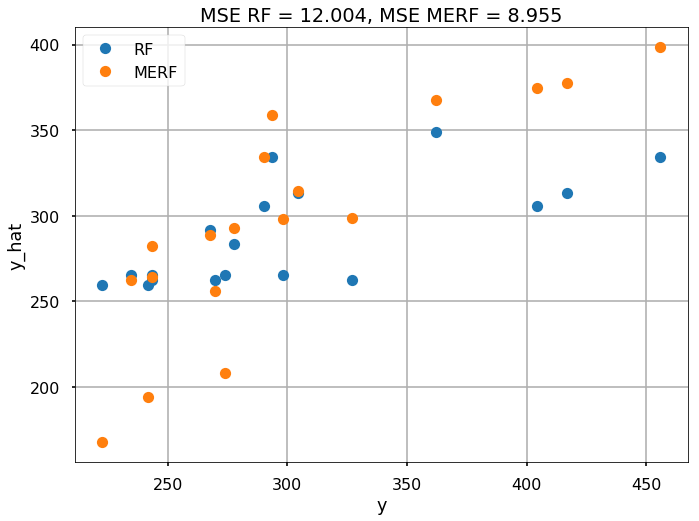

In [95]:
train, test = train_test_split(sleep_df, test_size=0.1, shuffle=True)
y = test['Reaction']

# Random Forest Training and Prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train[['Days']], train['Reaction'])
yhat_rf = rf.predict(test[['Days']])

# Mixed Effects Random Forest Training
mrf = MERF(n_estimators=100, max_iterations=20)
X_train =  train[['Days']]
Z_train = np.ones((len(X_train), 1))
clusters_train = train['Subject']
y_train = train['Reaction']
mrf.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test
X_test =  test[['Days']]
Z_test = np.ones((len(X_test), 1))
clusters_test = test['Subject']
yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)

# Compute MSE
mse_rf = np.sqrt(np.sum((y - yhat_rf)**2)) / len(y)
mse_mrf = np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y)

# Plot Scatter Plot of error
plt.plot(y, yhat_rf, 'o', label='RF')
plt.plot(y, yhat_mrf, 'o', label='MERF')
plt.grid('on')
plt.xlabel('y')
plt.ylabel('y_hat')

plt.legend()
plt.title('MSE RF = {:.3f}, MSE MERF = {:.3f}'.format(mse_rf, mse_mrf))

# Radon

We evaluate the performance of MERF on the famous Minnesota radon dataset. 

In [86]:
radon_df = pd.read_csv('../data/radon.csv')

In [87]:
radon_df.head()

,Unnamed: 0,idnum,state,state2,stfips,zip,region,typebldg,floor,room,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


In [88]:
radon_df[['floor', 'Uppm', 'county', 'log_radon']].head()

,floor,Uppm,county,log_radon
0,1.0,0.502054,AITKIN,0.832909
1,0.0,0.502054,AITKIN,0.832909
2,0.0,0.502054,AITKIN,1.098612
3,0.0,0.502054,AITKIN,0.095310
4,0.0,0.428565,ANOKA,1.163151


INFO     [merf.py:235] GLL is 179.5284100812834 at iteration 1.
INFO     [merf.py:235] GLL is 147.30569343924043 at iteration 2.
INFO     [merf.py:235] GLL is 131.83310462497303 at iteration 3.
INFO     [merf.py:235] GLL is 123.35303308954612 at iteration 4.
INFO     [merf.py:235] GLL is 119.94978568736906 at iteration 5.
INFO     [merf.py:235] GLL is 114.90298526359507 at iteration 6.
INFO     [merf.py:235] GLL is 112.44204919381573 at iteration 7.
INFO     [merf.py:235] GLL is 111.04696551121086 at iteration 8.
INFO     [merf.py:235] GLL is 110.64383926462135 at iteration 9.
INFO     [merf.py:235] GLL is 109.0673442920009 at iteration 10.
INFO     [merf.py:235] GLL is 108.19506717315161 at iteration 11.
INFO     [merf.py:235] GLL is 108.0100249062942 at iteration 12.
INFO     [merf.py:235] GLL is 108.24288021244776 at iteration 13.
INFO     [merf.py:235] GLL is 107.37127179643674 at iteration 14.
INFO     [merf.py:235] GLL is 108.20186901440967 at iteration 15.
INFO     [merf.py:235]

Text(0.5,1,'MSE RF = 0.080, MSE MERF = 0.076')

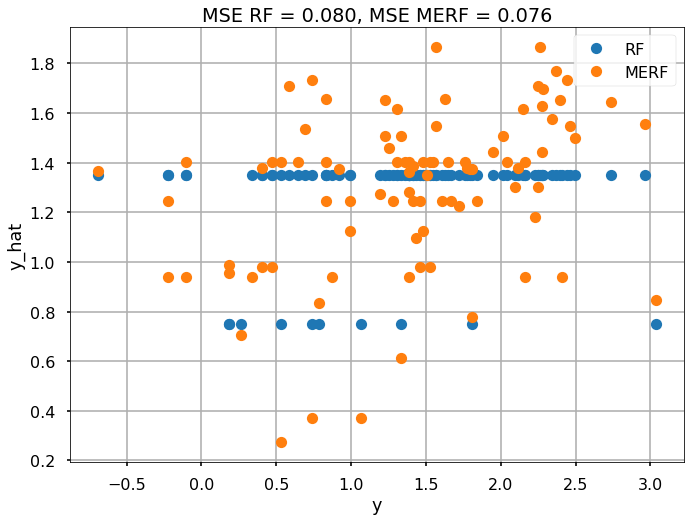

In [96]:
max_iter = 20
train, test = train_test_split(radon_df, test_size=0.1, shuffle=True)
y = test['log_radon']

# Random Forest Training and Prediction
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train[['floor']], train['log_radon'])
yhat_rf = rf.predict(test[['floor']])

# Mixed Effects Random Forest Training
mrf = MERF(n_estimators=100, max_iterations=max_iter)
X_train =  train[['floor']]
Z_train = np.ones((len(X_train), 1))
clusters_train = train['county']
y_train = train['log_radon']
mrf.fit(X_train, Z_train, clusters_train, y_train)

# Mixed Effects Random Forest Test
X_test =  test[['floor']]
Z_test = np.ones((len(X_test), 1))
clusters_test = test['county']
yhat_mrf = mrf.predict(X_test, Z_test, clusters_test)

# Compute MSE
mse_rf = np.sqrt(np.sum((y - yhat_rf)**2)) / len(y)
mse_mrf = np.sqrt(np.sum((y - yhat_mrf)**2)) / len(y)

# Plot Scatter Plot of error
plt.plot(y, yhat_rf, 'o', label='RF')
plt.plot(y, yhat_mrf, 'o', label='MERF')
plt.grid('on')
plt.xlabel('y')
plt.ylabel('y_hat')
plt.legend()
plt.title('MSE RF = {:.3f}, MSE MERF = {:.3f}'.format(mse_rf, mse_mrf))

Text(0.5,0,'Iteration')

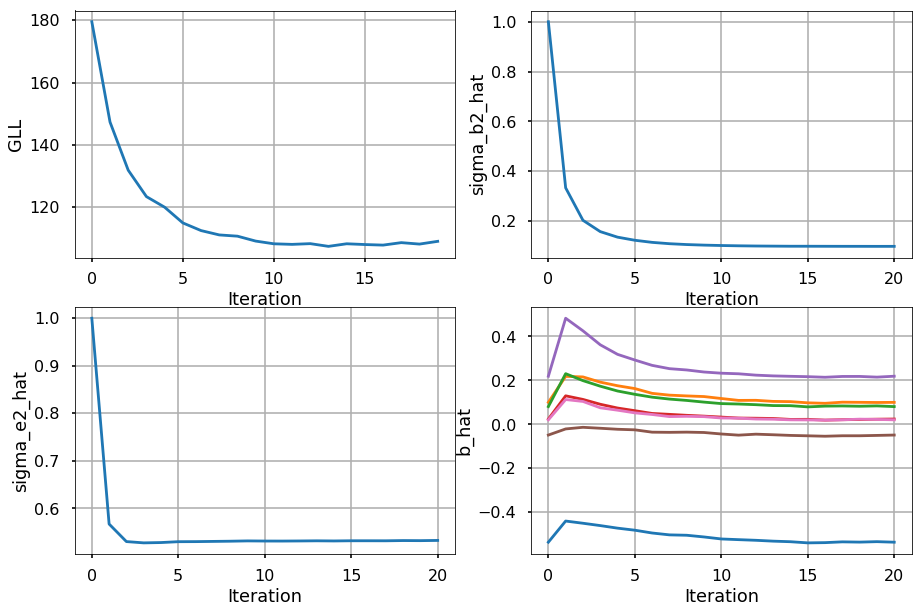

In [97]:
plt.figure(figsize=[15,10])
plt.subplot(221)
plt.plot(mrf.gll_history)
plt.grid('on')
plt.ylabel('GLL')
plt.xlabel('Iteration')

plt.subplot(222)
D_hat_history = [x[0][0] for x in mrf.D_hat_history]
plt.plot(D_hat_history)
plt.grid('on')
plt.ylabel('sigma_b2_hat')
plt.xlabel('Iteration')

plt.subplot(223)
plt.plot(mrf.sigma2_hat_history)
plt.grid('on')
plt.ylabel('sigma_e2_hat')
plt.xlabel('Iteration')

plt.subplot(224)
b_df = pd.concat(mrf.b_hat_history, axis=1)
b_df.columns = range(0, max_iter + 1)
plt.plot(b_df.iloc[0])
plt.plot(b_df.iloc[10])
plt.plot(b_df.iloc[20])
plt.plot(b_df.iloc[30])
plt.plot(b_df.iloc[40])
plt.plot(b_df.iloc[50])
plt.plot(b_df.iloc[60])
plt.grid('on')
plt.ylabel('b_hat')
plt.xlabel('Iteration')